# EDA on Electra Dataset
###### *Samruddhi Khairnar*

#### 0. Downloading the Electra Dataset

In [ ]:
!wget http://perception.inf.um.es/ICS-datasets/csv/electra_modbus.zip
!pip install unzip
!unzip electra_modbus.zip

--2023-06-05 13:09:20--  http://perception.inf.um.es/ICS-datasets/csv/electra_modbus.zip
Resolving perception.inf.um.es (perception.inf.um.es)... 155.54.204.141
Connecting to perception.inf.um.es (perception.inf.um.es)|155.54.204.141|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 57856090 (55M) [application/zip]
Saving to: ‘electra_modbus.zip’

electra_modbus.zip  100%[===================>]  55.18M  19.6MB/s    in 2.8s    

2023-06-05 13:09:24 (19.6 MB/s) - ‘electra_modbus.zip’ saved [57856090/57856090]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for unzip: filename=unzip-1.0.0-py3-none-any.whl size=1279 sha256=cfad2fc0ed1d2d80d92f15b206d049a7e1cfbffe31ced32bd4c4fb8f63098d18
  Stored in directory: /root/.cache/pip/wheels/80/dc/7a/f8af45bc239e7933509183f038ea8d46f3610aab82b35369f4
Successfully built unzip
Archive:  electra_modbus.zip
  inflating: ele

#### 1. Loading the Electra Dataset


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('electra_modbus.csv')

In [ ]:
df.label.unique()

array(['MITM_UNALTERED', 'NORMAL', 'RESPONSE_ATTACK',
       'FORCE_ERROR_ATTACK', 'RECOGNITION_ATTACK', 'WRITE_ATTACK',
       'READ_ATTACK', 'REPLAY_ATTACK'], dtype=object)

####2. Sampling 400 records for each label type => Dummy dataset for Kafka Producer

In [ ]:
l = df.label.unique()
dummy = df.head(1)
for x in l:
  y = df.loc[df.label==x][:400]
  dummy = dummy.append(y, ignore_index=True)

<ipython-input-11-89dadac8382c>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dummy = dummy.append(y, ignore_index=True)


In [ ]:
dummy = dummy.sample(frac=1)
dummy.to_csv('dummy.csv', index=False)

# Exploratory Data Analysis
##### *Understanding all types of attack labels and their relation with the dataset features*

![](https://drive.google.com/uc?export=view&id=1hm0dXZyhNaY9qjRnND4g0iiO-RRVux8J)

#### 3. Printing 5 records for each type of record - attacks + normal

In [ ]:
df.loc[df.label=='NORMAL'][-5:]

,Time,smac,dmac,sip,dip,request,fc,error,address,data,label
16289272,50333737643,00:0e:8c:e1:de:9c,00:1b:1b:c1:41:1b,10.70.38.56,10.70.38.51,0,3,0,64,0,NORMAL
16289273,50333737643,00:0e:8c:e1:de:9c,00:1b:1b:c1:41:1b,10.70.38.56,10.70.38.51,0,3,0,65,0,NORMAL
16289274,50333737643,00:0e:8c:e1:de:9c,00:1b:1b:c1:41:1b,10.70.38.56,10.70.38.51,0,3,0,66,0,NORMAL
16289275,50333737643,00:0e:8c:e1:de:9c,00:1b:1b:c1:41:1b,10.70.38.56,10.70.38.51,0,3,0,67,0,NORMAL
16289276,50333737643,00:0e:8c:e1:de:9c,00:1b:1b:c1:41:1b,10.70.38.56,10.70.38.51,0,3,0,68,0,NORMAL


In [ ]:
df.loc[df.label=='MITM_UNALTERED'][:5]

,Time,smac,dmac,sip,dip,request,fc,error,address,data,label
0,0,00:1b:1b:c1:41:1b,08:00:27:79:b0:4a,10.70.38.51,10.70.38.55,1,3,0,1,68,MITM_UNALTERED
1,2107,08:00:27:79:b0:4a,00:0e:8c:e1:dd:58,10.70.38.51,10.70.38.55,1,3,0,1,68,MITM_UNALTERED
3,8718,00:0e:8c:e1:dd:58,08:00:27:79:b0:4a,10.70.38.55,10.70.38.51,0,3,0,1,0,MITM_UNALTERED
4,8718,00:0e:8c:e1:dd:58,08:00:27:79:b0:4a,10.70.38.55,10.70.38.51,0,3,0,2,0,MITM_UNALTERED
5,8718,00:0e:8c:e1:dd:58,08:00:27:79:b0:4a,10.70.38.55,10.70.38.51,0,3,0,3,0,MITM_UNALTERED


In [ ]:
df.loc[df.label=='READ_ATTACK'][:5]

,Time,smac,dmac,sip,dip,request,fc,error,address,data,label
296619,420728389,08:00:27:79:b0:4a,00:0e:8c:e1:dd:58,10.70.38.131,10.70.38.55,1,2,0,1,26,READ_ATTACK
296620,420733149,00:0e:8c:e1:dd:58,08:00:27:79:b0:4a,10.70.38.55,10.70.38.131,0,2,0,1,0,READ_ATTACK
296621,420733149,00:0e:8c:e1:dd:58,08:00:27:79:b0:4a,10.70.38.55,10.70.38.131,0,2,0,2,0,READ_ATTACK
296622,420733149,00:0e:8c:e1:dd:58,08:00:27:79:b0:4a,10.70.38.55,10.70.38.131,0,2,0,3,0,READ_ATTACK
296623,420733149,00:0e:8c:e1:dd:58,08:00:27:79:b0:4a,10.70.38.55,10.70.38.131,0,2,0,4,0,READ_ATTACK


In [ ]:
df.loc[df.label=='REPLAY_ATTACK'][:5]

,Time,smac,dmac,sip,dip,request,fc,error,address,data,label
1904098,5746112372,08:00:27:79:b0:4a,00:0e:8c:e1:dd:58,10.70.38.131,10.70.38.55,1,3,0,1,68,REPLAY_ATTACK
1904099,5746120578,00:0e:8c:e1:dd:58,08:00:27:79:b0:4a,10.70.38.55,10.70.38.131,0,3,0,1,0,REPLAY_ATTACK
1904100,5746120578,00:0e:8c:e1:dd:58,08:00:27:79:b0:4a,10.70.38.55,10.70.38.131,0,3,0,2,0,REPLAY_ATTACK
1904101,5746120578,00:0e:8c:e1:dd:58,08:00:27:79:b0:4a,10.70.38.55,10.70.38.131,0,3,0,3,0,REPLAY_ATTACK
1904102,5746120578,00:0e:8c:e1:dd:58,08:00:27:79:b0:4a,10.70.38.55,10.70.38.131,0,3,0,4,0,REPLAY_ATTACK


In [ ]:
df.loc[df.label=='WRITE_ATTACK'][:5]

,Time,smac,dmac,sip,dip,request,fc,error,address,data,label
260539,291732002,00:0e:8c:e1:dd:58,08:00:27:79:b0:4a,10.70.38.55,10.70.38.131,0,144,2,0,0,WRITE_ATTACK
280317,362482592,00:0e:8c:e1:dd:58,08:00:27:79:b0:4a,10.70.38.55,10.70.38.131,0,144,2,0,0,WRITE_ATTACK
1870506,5626033850,00:0e:8c:e1:dd:58,08:00:27:79:b0:4a,10.70.38.55,10.70.38.131,0,144,2,0,0,WRITE_ATTACK
1886947,5684642456,00:0e:8c:e1:dd:58,08:00:27:79:b0:4a,10.70.38.55,10.70.38.131,0,144,2,0,0,WRITE_ATTACK
1887923,5688189390,00:0e:8c:e1:dd:58,08:00:27:79:b0:4a,10.70.38.55,10.70.38.131,0,144,2,0,0,WRITE_ATTACK


In [ ]:
df.loc[df.label=='RECOGNITION_ATTACK'][:5]

,Time,smac,dmac,sip,dip,request,fc,error,address,data,label
258857,285872158,08:00:27:79:b0:4a,00:0e:8c:e1:dd:58,10.70.38.131,10.70.38.55,1,3,0,0,0,RECOGNITION_ATTACK
258858,285877429,00:0e:8c:e1:dd:58,08:00:27:79:b0:4a,10.70.38.55,10.70.38.131,0,131,0,0,0,RECOGNITION_ATTACK
258928,286185529,08:00:27:79:b0:4a,00:0e:8c:e1:dd:58,10.70.38.131,10.70.38.55,1,4,0,0,0,RECOGNITION_ATTACK
258929,286191372,00:0e:8c:e1:dd:58,08:00:27:79:b0:4a,10.70.38.55,10.70.38.131,0,132,0,0,0,RECOGNITION_ATTACK
259206,287174058,08:00:27:79:b0:4a,00:0e:8c:e1:dd:58,10.70.38.131,10.70.38.55,1,5,0,0,0,RECOGNITION_ATTACK


In [ ]:
df.loc[df.label=='FORCE_ERROR_ATTACK'][:5]

,Time,smac,dmac,sip,dip,request,fc,error,address,data,label
3102,3260308,08:00:27:79:b0:4a,00:1b:1b:c1:41:1b,10.70.38.55,10.70.38.51,0,3,4,0,0,FORCE_ERROR_ATTACK
5445,5760647,08:00:27:79:b0:4a,00:1b:1b:c1:41:1b,10.70.38.55,10.70.38.51,0,3,6,0,0,FORCE_ERROR_ATTACK
7241,8010006,08:00:27:79:b0:4a,00:1b:1b:c1:41:1b,10.70.38.55,10.70.38.51,0,3,5,0,0,FORCE_ERROR_ATTACK
10959,11758860,08:00:27:79:b0:4a,00:1b:1b:c1:41:1b,10.70.38.55,10.70.38.51,0,3,1,0,0,FORCE_ERROR_ATTACK
14130,15259093,08:00:27:79:b0:4a,00:1b:1b:c1:41:1b,10.70.38.55,10.70.38.51,0,3,1,0,0,FORCE_ERROR_ATTACK


In [ ]:
df.loc[df.label=='RESPONSE_ATTACK'][:5]

,Time,smac,dmac,sip,dip,request,fc,error,address,data,label
968,1011777,08:00:27:79:b0:4a,00:1b:1b:c1:41:1b,10.70.38.55,10.70.38.51,0,3,0,2,2304,RESPONSE_ATTACK
1036,1011777,08:00:27:79:b0:4a,00:1b:1b:c1:41:1b,10.70.38.55,10.70.38.51,0,3,0,70,2304,RESPONSE_ATTACK
1099,1011777,08:00:27:79:b0:4a,00:1b:1b:c1:41:1b,10.70.38.55,10.70.38.51,0,3,0,133,0,RESPONSE_ATTACK
1104,1011777,08:00:27:79:b0:4a,00:1b:1b:c1:41:1b,10.70.38.55,10.70.38.51,0,3,0,138,2304,RESPONSE_ATTACK
1135,1011777,08:00:27:79:b0:4a,00:1b:1b:c1:41:1b,10.70.38.55,10.70.38.51,0,3,0,169,0,RESPONSE_ATTACK


In [ ]:
df.data.unique()

array([   68,     0, 65535, ..., 36918,  2498, 64142])

In [ ]:
df.tail()

,Time,smac,dmac,sip,dip,request,fc,error,address,data,label
16289272,50333737643,00:0e:8c:e1:de:9c,00:1b:1b:c1:41:1b,10.70.38.56,10.70.38.51,0,3,0,64,0,NORMAL
16289273,50333737643,00:0e:8c:e1:de:9c,00:1b:1b:c1:41:1b,10.70.38.56,10.70.38.51,0,3,0,65,0,NORMAL
16289274,50333737643,00:0e:8c:e1:de:9c,00:1b:1b:c1:41:1b,10.70.38.56,10.70.38.51,0,3,0,66,0,NORMAL
16289275,50333737643,00:0e:8c:e1:de:9c,00:1b:1b:c1:41:1b,10.70.38.56,10.70.38.51,0,3,0,67,0,NORMAL
16289276,50333737643,00:0e:8c:e1:de:9c,00:1b:1b:c1:41:1b,10.70.38.56,10.70.38.51,0,3,0,68,0,NORMAL


#### 4. Plotting the count of records of each type

In [ ]:
import numpy as np
import importlib
importlib.reload(plt)

sns.set(rc={'figure.figsize':(20,10)})
sns.set_style("whitegrid", {'axes.grid' : False})

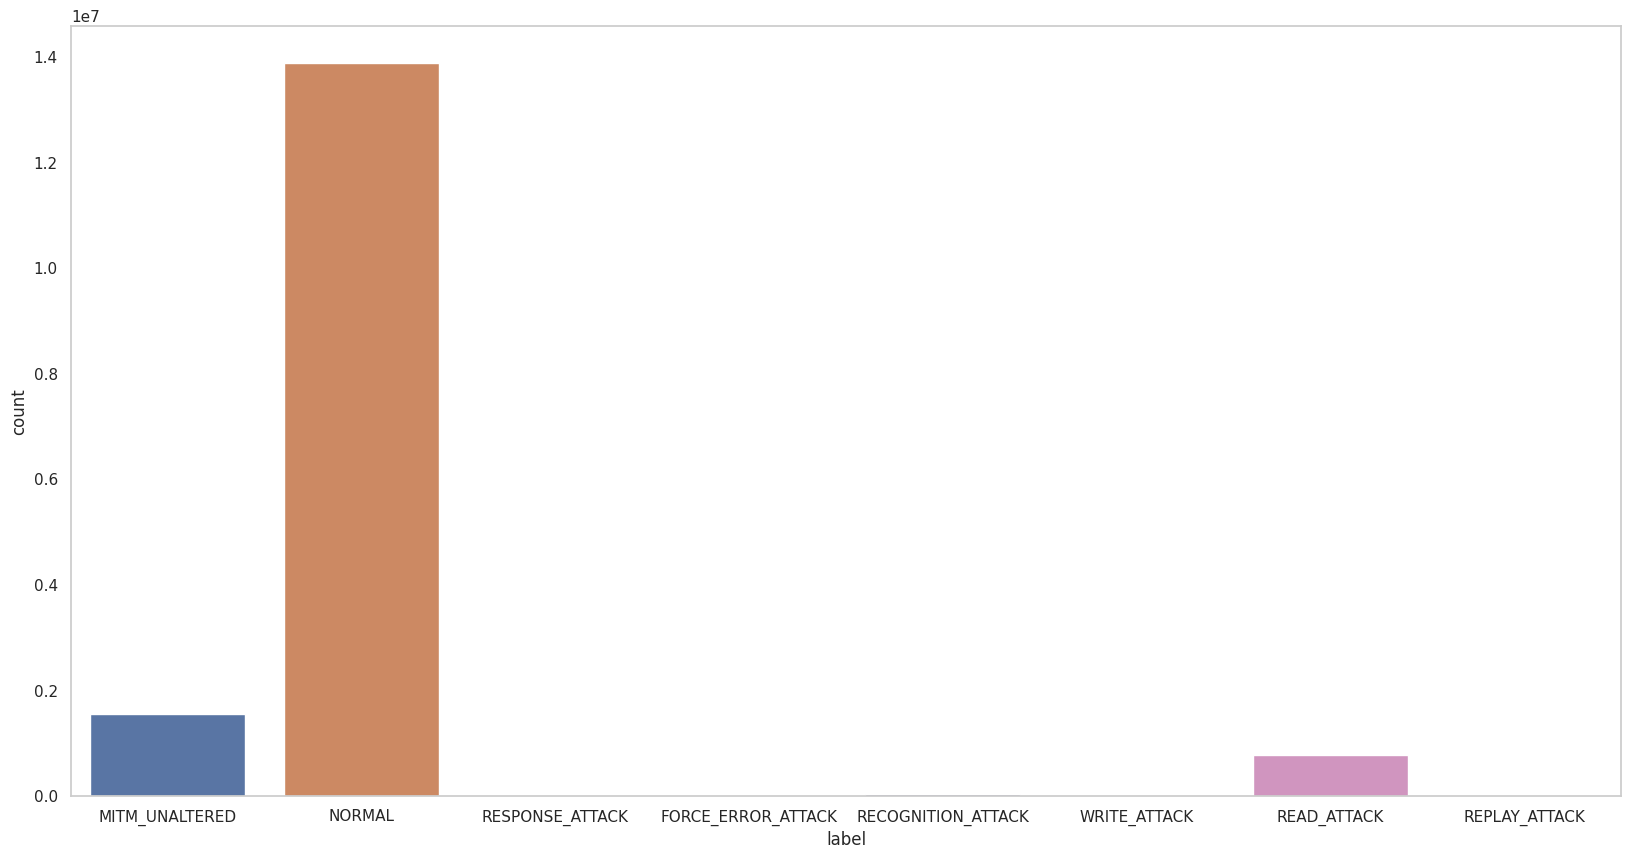

In [ ]:
sns.countplot(x='label', data=df);

#### 5. Plotting the function code for all records

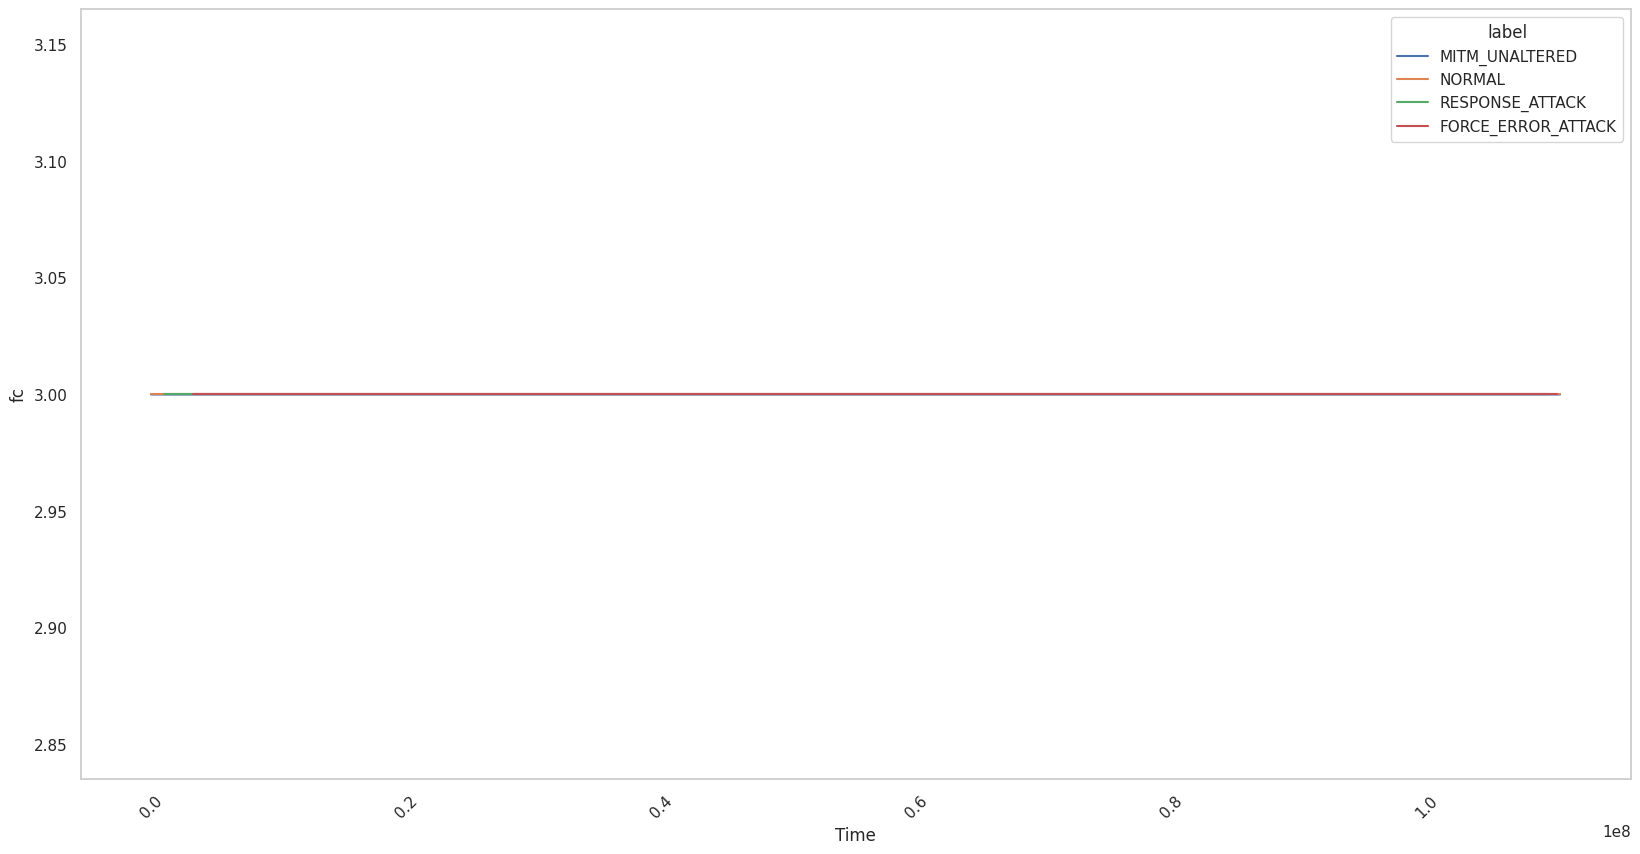

In [ ]:
sns.lineplot(x='Time', y='fc', data=df.iloc[:100000], hue='label')
plt.xticks(rotation=45);

#### 6. Address vs Time, plotted for all records

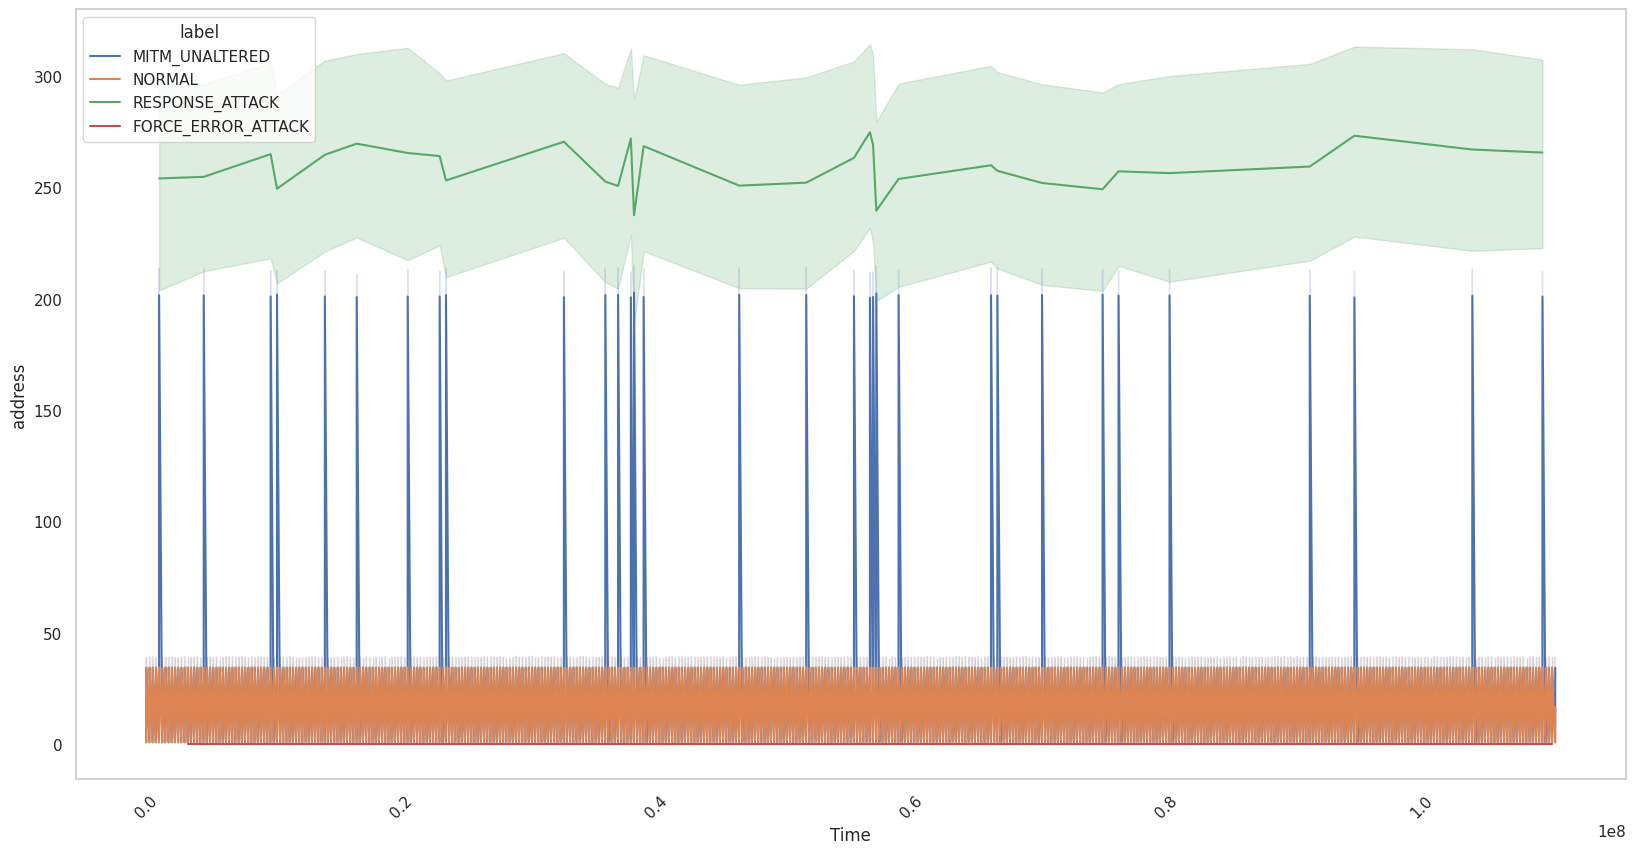

In [ ]:
sns.lineplot(x='Time', y='address', data=df.iloc[:100000], hue='label')
plt.xticks(rotation=45);

#### 7. Request field vs Time

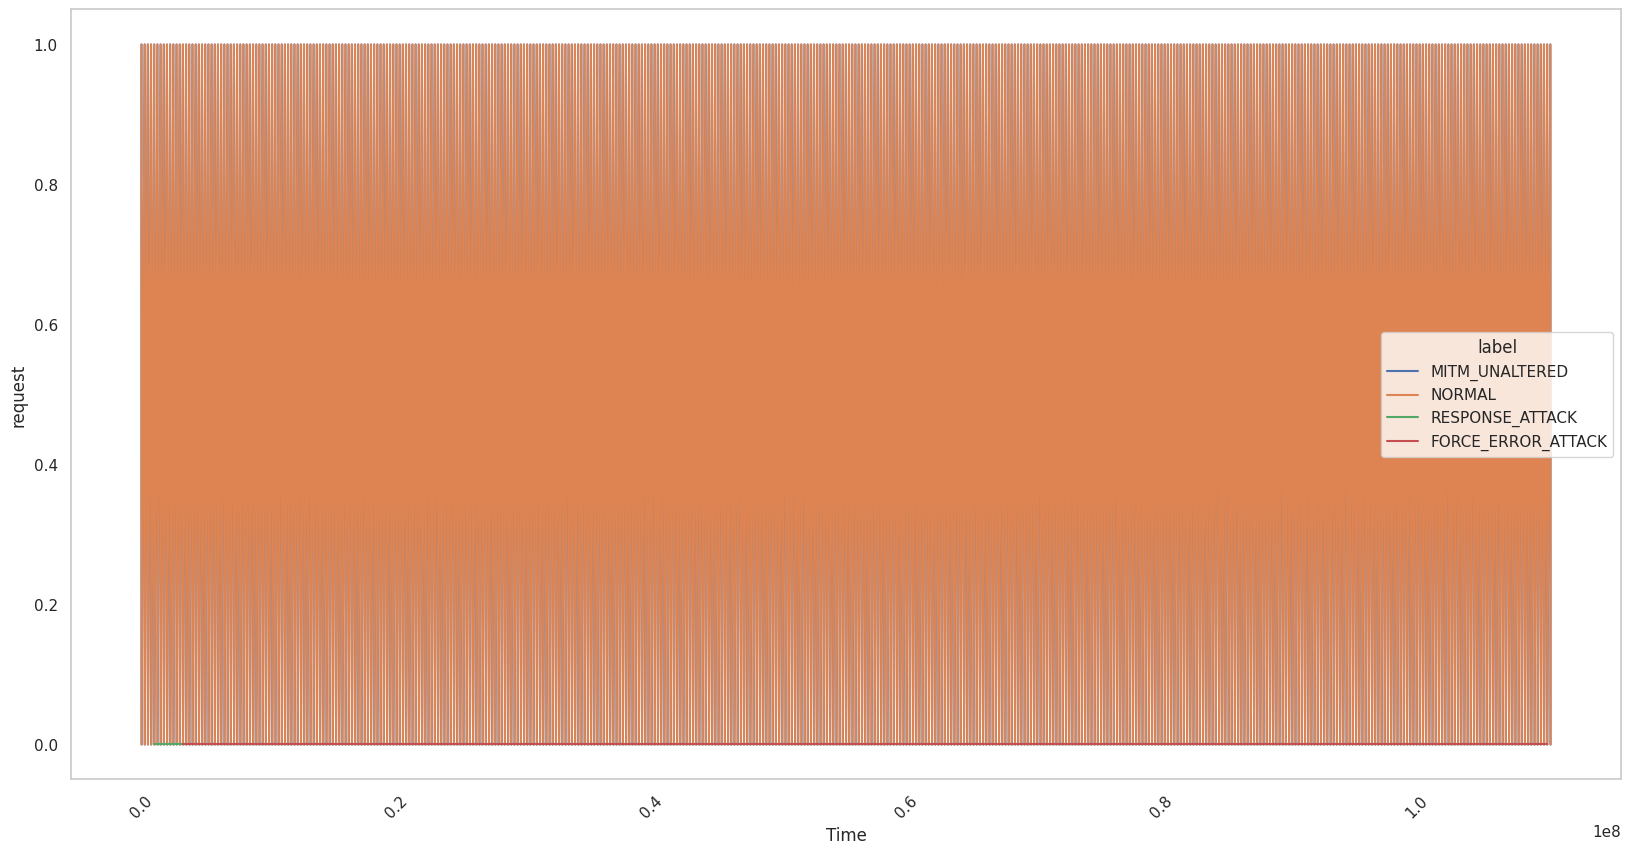

In [ ]:
sns.lineplot(x='Time', y='request', data=df.iloc[:100000], hue='label')
plt.xticks(rotation=45);

#### 8. Error field vs Time

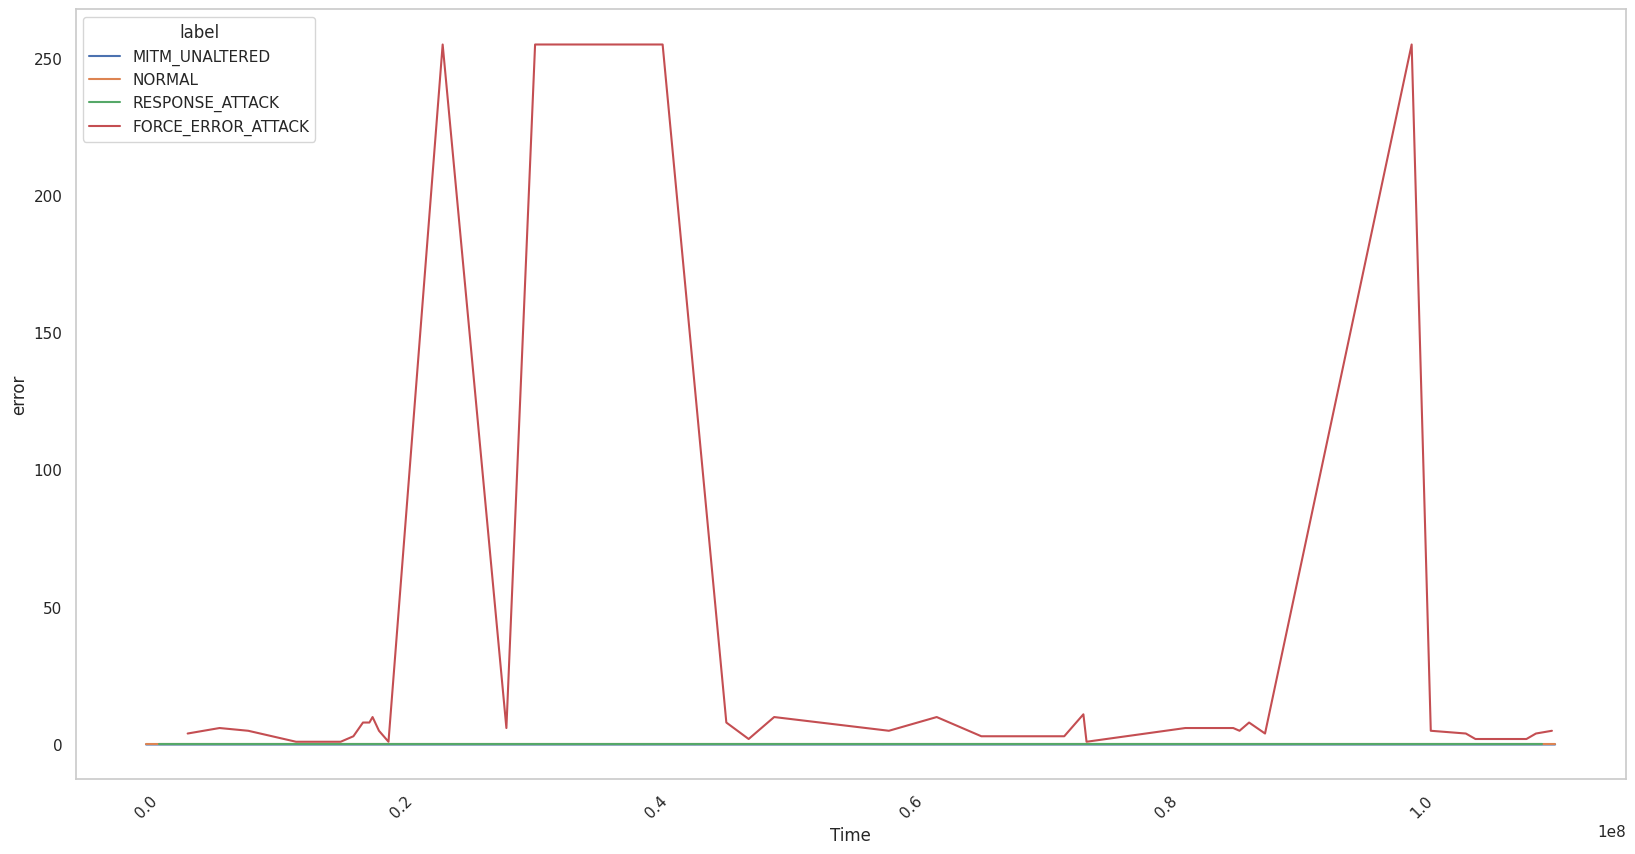

In [ ]:
sns.lineplot(x='Time', y='error', data=df.iloc[:100000], hue='label')
plt.xticks(rotation=45);

#### 9. Data field vs Time

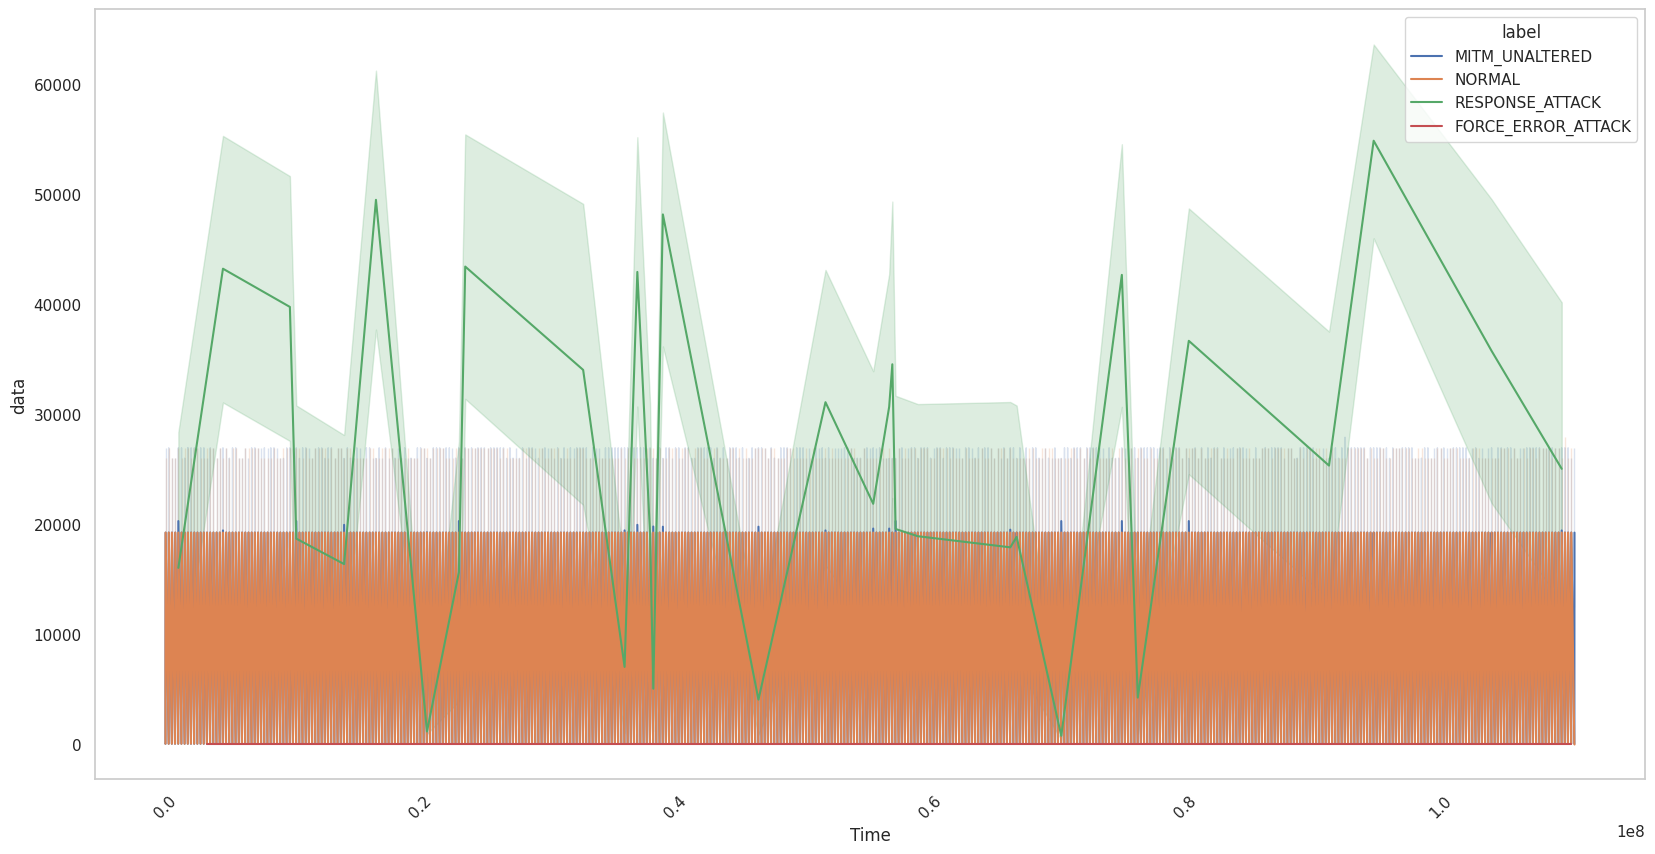

In [ ]:
sns.lineplot(x='Time', y='data', data=df.iloc[:100000], hue='label')
plt.xticks(rotation=45);

# HDFS Issue

In [ ]:
tweety@tweety-HP-ProBook-450-G3:~$ stop-all.sh
tweety@tweety-HP-ProBook-450-G3:~$ sudo chmod 777 /hadoop
tweety@tweety-HP-ProBook-450-G3:~$ rm -rf /hadoop/dfs/*
tweety@tweety-HP-ProBook-450-G3:~$ mkdir /hadoop/dfs/data
tweety@tweety-HP-ProBook-450-G3:~$ mkdir /hadoop/dfs/name
tweety@tweety-HP-ProBook-450-G3:~$ hdfs namenode -format
tweety@tweety-HP-ProBook-450-G3:~$ start-all.sh